# Seattle

This notebooks displays some of the data available at [Pronto Open Data](http://www.prontocycleshare.com/data). We assume the data was downloaded.

In [ ]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [ ]:
%matplotlib inline

## Data

In [ ]:
from pyensae.datasource import download_data
file = download_data("open_data_2016-12.zip", url="https://s3.amazonaws.com/pronto-data/")

### Stations

In [ ]:
import pandas
stations = df = pandas.read_csv("2016-12_station_data.csv")
df.head()

,station_id,name,lat,long,install_date,install_dockcount,modification_date,current_dockcount,decommission_date
0,CH-06,12th Ave & E Denny Way,47.618549,-122.317017,10/13/2014,16,NaN,16,NaN
1,CH-15,12th Ave & E Mercer St,47.624142,-122.316811,10/13/2014,16,NaN,16,NaN
2,CD-01,12th Ave & E Yesler Way,47.602103,-122.316923,5/22/2015,16,8/9/2016,0,8/9/2016
3,UD-04,12th Ave & NE Campus Pkwy,47.656395,-122.315620,10/13/2014,16,NaN,16,NaN
4,CH-05,15th Ave E & E Thomas St,47.620712,-122.312805,10/13/2014,16,NaN,16,NaN


In [ ]:
import folium
from pyensae.notebook_helper import folium_html_map
minx, maxx = df.lat.min(), df.lat.max()
miny, maxy = df.long.min(), df.long.max()
map_osm = folium.Map(location=[47.618549, -122.317017], 
                     min_lat=minx, max_lat=maxx, min_lon=miny, max_lon=maxy, zoom_start=12)
for rows in df.to_dict("records"):
    x,y = rows["lat"], rows["long"]
    name = rows["name"]
    map_osm.add_child(folium.CircleMarker([x, y], popup=name, radius=15, fill_color="yellow"))
folium_html_map(map_osm, width="80%")

<pyensae.notebook_helper.folium_helper.folium_html_map.<locals>.CustomFoliumMap at 0x1da4eea1518>

### Trips

In [ ]:
bikes = df = pandas.read_csv("2016-12_trip_data.csv")
df.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0


In [ ]:
df.shape

(263136, 12)

In [ ]:
df["dtstart"] = pandas.to_datetime(df.starttime, infer_datetime_format=True)
df["dtstop"] = pandas.to_datetime(df.stoptime, infer_datetime_format=True)

In [ ]:
from datetime import datetime, time
df["day"] = df.dtstart.apply(lambda r: datetime(r.year, r.month, r.day))
df["time"] = df.dtstart.apply(lambda r: time(r.hour, r.minute, 0))

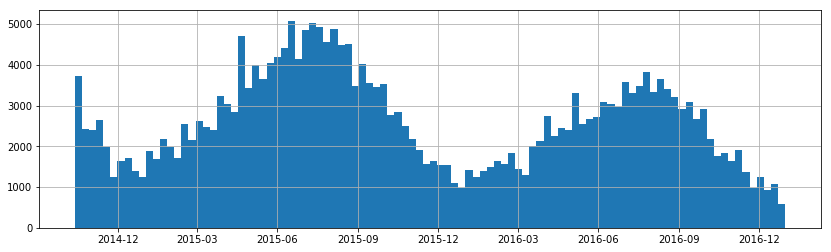

In [ ]:
df.day.hist(figsize=(14,4), bins=100)

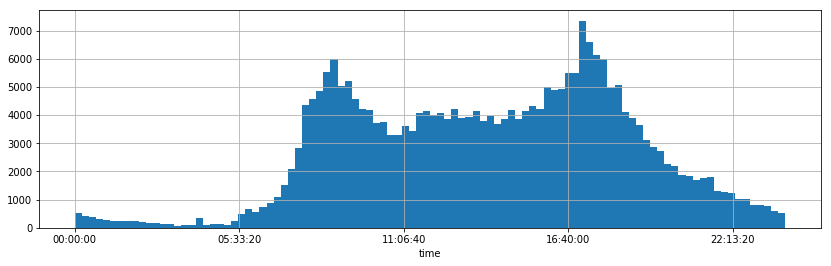

In [ ]:
df.time.hist(figsize=(14,4), bins=100)

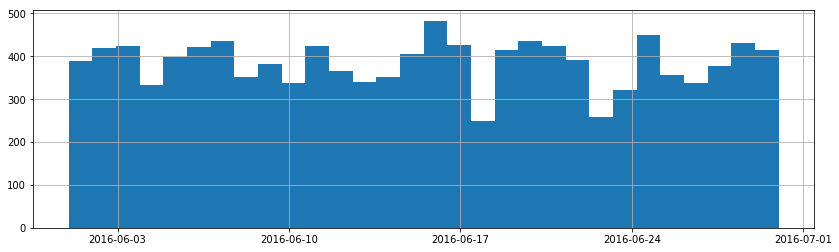

In [ ]:
june = df[(df.dtstart >= datetime(2016,6,1)) & (df.dtstart < datetime(2016,7,1))]
june.day.hist(figsize=(14,4), bins=30)

In [ ]:
june11 = june[(june.dtstart >= datetime(2016,6,11)) & (june.dtstart < datetime(2016,6,12))].copy()

In [ ]:
june11[["from_station_id", "trip_id"]].groupby("from_station_id").count().sort_values("trip_id", ascending=False).head(n=20)

,trip_id
from_station_id,
WF-01,28
SLU-02,25
EL-01,22
SLU-19,21
WF-04,19
PS-04,19
BT-01,18
BT-05,14
CBD-13,13


Too few values...